## Bike Sharing Assignment


## Question need to be answered:
- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

##  Step 1: Reading and understanding data

In [1417]:
# Importing important libraries 
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1335]:
# Read data
bs = pd.read_csv('day.csv')
pd.set_option('display.max_columns',50)
bs.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1336]:
bs.shape   # to see the number of rows and columns

(730, 16)

In [1337]:
bs.info() # check the meta-data and see if there are any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [1338]:
bs.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [1339]:
# we dont need instant in our analysis so lets drop it
bs= bs.drop('instant', axis=1)
bs.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1340]:
# since we have alreday splitted date into month, year, days we don't need dteday in our anlysis
bs= bs.drop('dteday', axis=1)
bs.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


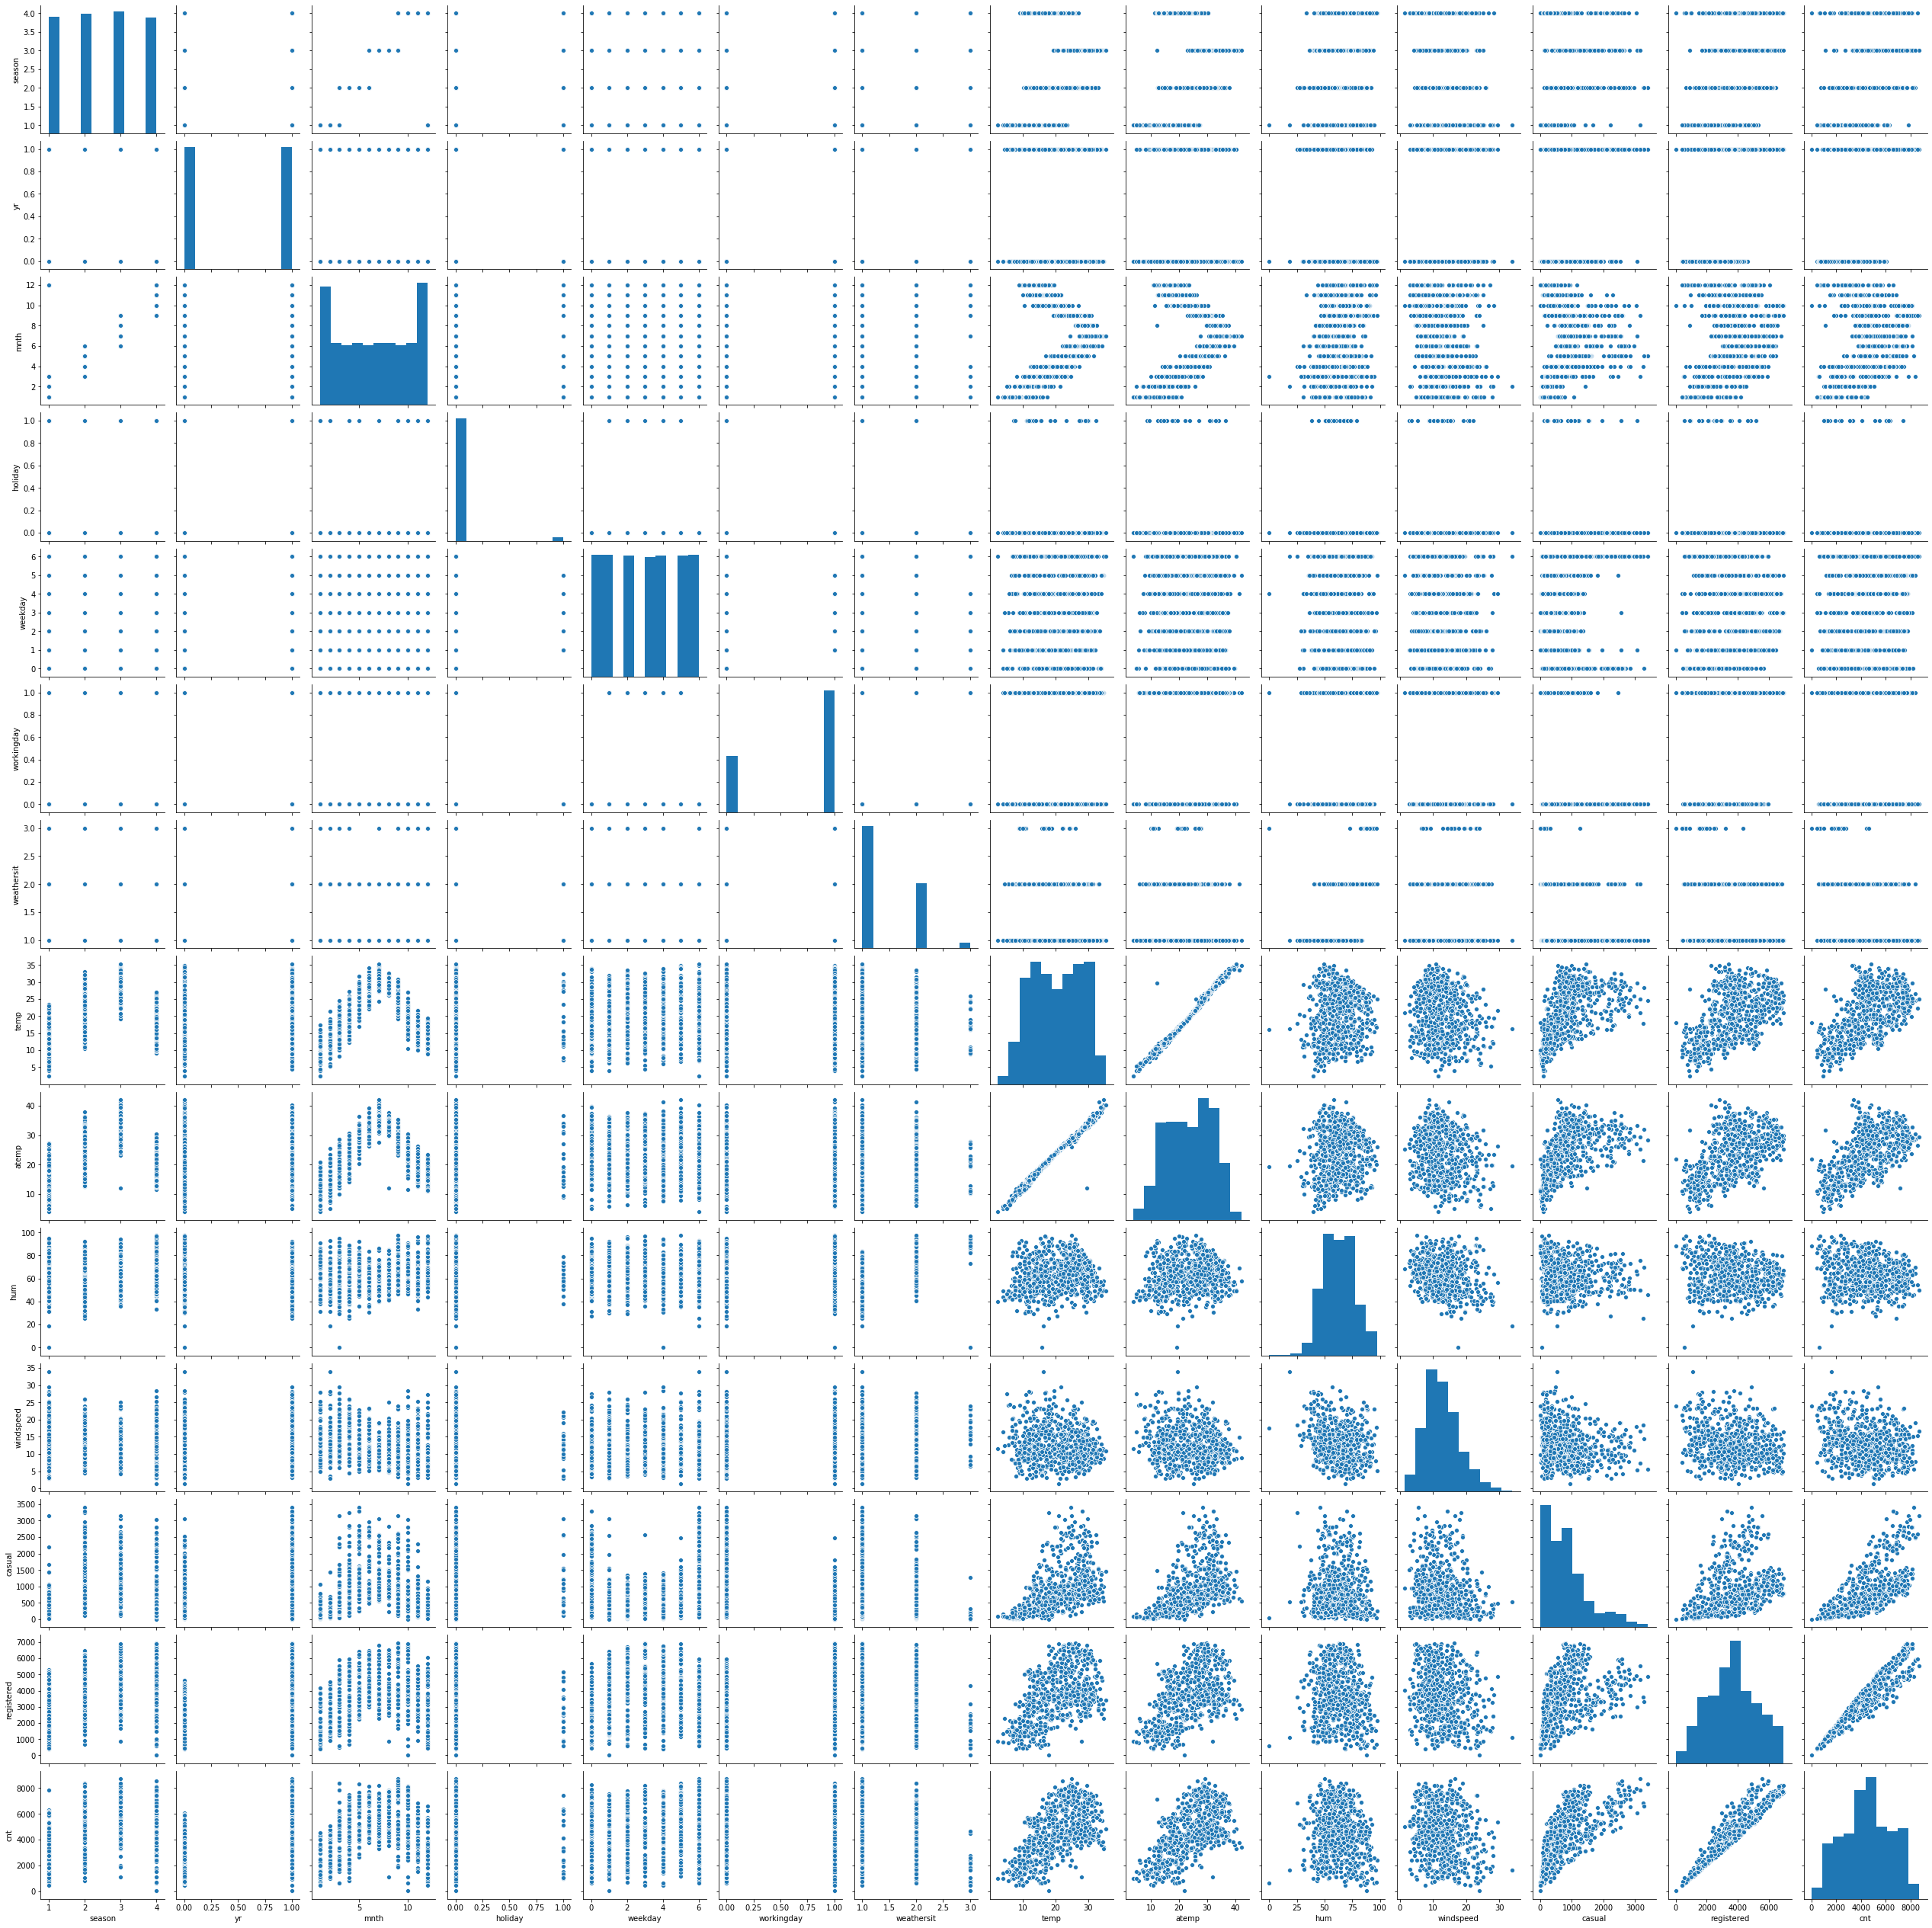

In [1341]:
# Lets visualize different variables using a pair plot and see if there is some pattern as we should never run the regression
# without having a good look at our data according to Anscombe's Quartet. 
sns.pairplot(bs)
plt.show()

In [ ]:
# We can see that atemp, temp shows strong correlation with cnt. We can also see that windspeed and hum are scattered 
# and have high variance

In [1342]:
# casual and registered are not needed in the analysis as we get these once we complete the survey on a particular day.
# Lets drop these as well
bs= bs.drop('casual', axis=1)
bs= bs.drop('registered', axis=1)


In [1343]:
bs.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


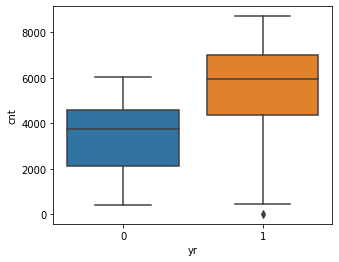

In [1346]:
plt.figure(figsize=(5,4))
sns.boxplot(x='yr',y='cnt', data= bs)
plt.show()

In [1347]:
# We can observe that the demand of bikes increased in 2019 as compared to 2018
# We can also observe that few outliers exists in 2019 where the count is nearly zero.

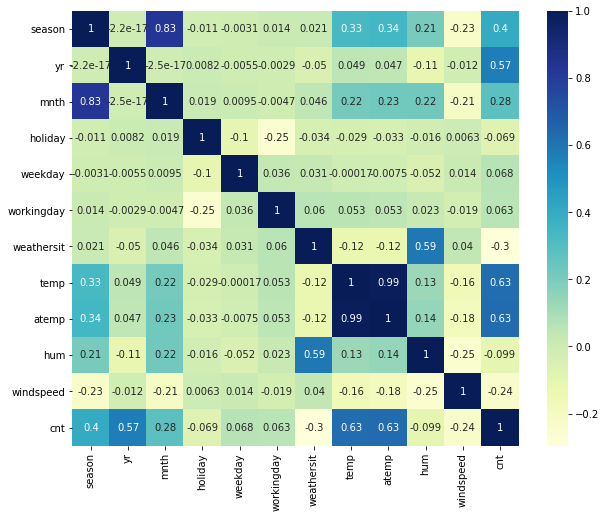

In [1348]:
#Lets see the correlation among different variables
plt.figure(figsize=(10,8))
sns.heatmap(bs.corr(),cmap="YlGnBu", annot= True)
plt.show()

In [1349]:
# temp and atemp are highly correlated, we can drop one of these. Let's drop temp
bs= bs.drop('temp', axis=1)

In [1350]:
# convert weathersit into categorical variable
bs['weathersit'] = bs['weathersit'].apply([lambda x: x.map({1:'clear', 2:'misty_cloudy', 3:'light_rain',4:'heavy_rain'})])

In [1351]:
# convert weeldays into categorical variables
bs['weekday'] = bs['weekday'].apply([lambda x: x.map({0:'Sunday', 1:'Monday', 2:'Tuesday', 3:'Wednesday', 4:'Thursday',5:'Friday',6:'Saturday'})])

In [1352]:
# convert mnth into categorical variables
bs['mnth'] = bs['mnth'].apply([lambda x: x.map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})])

In [1353]:
# convert season into categorical variable
bs['season'] = bs['season'].apply([lambda x: x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})])

In [1354]:
bs.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Saturday,0,misty_cloudy,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Sunday,0,misty_cloudy,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Monday,1,clear,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Tuesday,1,clear,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Wednesday,1,clear,11.46350,43.6957,12.522300,1600


## Step 2: Data Preparation 

#### creating dummy variables for categorical variables
 we can drop first column as the information needed can be extracted from the last two

In [1355]:
dum1 = pd.get_dummies(bs['season'], drop_first = True)
dum1.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [1356]:
# concatinate with bs
bs= pd.concat([bs,dum1], axis=1)

In [1357]:
# now we can drop season
bs= bs.drop('season',axis=1)

In [1358]:
bs.head()

,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt,spring,summer,winter
0,0,Jan,0,Saturday,0,misty_cloudy,18.18125,80.5833,10.749882,985,1,0,0
1,0,Jan,0,Sunday,0,misty_cloudy,17.68695,69.6087,16.652113,801,1,0,0
2,0,Jan,0,Monday,1,clear,9.47025,43.7273,16.636703,1349,1,0,0
3,0,Jan,0,Tuesday,1,clear,10.60610,59.0435,10.739832,1562,1,0,0
4,0,Jan,0,Wednesday,1,clear,11.46350,43.6957,12.522300,1600,1,0,0


In [1359]:
dum1 = pd.get_dummies(bs['weathersit'], drop_first = True)
dum1.head()

,light_rain,misty_cloudy
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [1360]:
# concatinate with bs
bs= pd.concat([bs,dum1], axis=1)

In [1361]:
# now we can drop weathersit
bs= bs.drop('weathersit',axis=1)

In [1362]:
bs.head()

,yr,mnth,holiday,weekday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light_rain,misty_cloudy
0,0,Jan,0,Saturday,0,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,Jan,0,Sunday,0,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,Jan,0,Monday,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0
3,0,Jan,0,Tuesday,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0
4,0,Jan,0,Wednesday,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0


In [1363]:
dum1 = pd.get_dummies(bs['weekday'], drop_first = True)
dum1.head()

,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [1364]:
# concatinate with bs
bs= pd.concat([bs,dum1], axis=1)

In [1365]:
# now we can drop weekday
bs= bs.drop('weekday',axis=1)

In [1366]:
bs.head()

,yr,mnth,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light_rain,misty_cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,Jan,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,1,0,0,0,0
1,0,Jan,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,1,0,0,0
2,0,Jan,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,1,0,0,0,0,0
3,0,Jan,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,0,1,0
4,0,Jan,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,1


In [1367]:
dum1 = pd.get_dummies(bs['mnth'], drop_first = True)
dum1.head()

,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [1368]:
# concatinate with bs
bs= pd.concat([bs,dum1], axis=1)

In [1369]:
# now we can drop mnth
bs= bs.drop('mnth',axis=1)

In [1370]:
bs.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light_rain,misty_cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
0,0,0,0,18.18125,80.5833,10.749882,985,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0


In [1371]:
# Dividing into test and train
df_train,df_test = train_test_split(bs, train_size=0.7,test_size=0.3, random_state= 100)
print(df_train.shape)
print(df_test.shape)

(510, 29)
(219, 29)


#### Scaling the variables

In [1372]:
# 1. Create an object
scaler = MinMaxScaler()

# we will rescale only numeric variables 
# create a list of numeric variable
num_vars = ['atemp','hum', 'windspeed','cnt']

# 2. Fit on data
# fit(): learns xmin,xmax
#transform(): x-xmin/xmax-xmin
#fit_transform(): fit+transform 
df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,spring,summer,winter,light_rain,misty_cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Dividing X_train, y_train

In [1373]:
# We have seperated cnt in y_train as it is our target variavle
y_train= df_train.pop('cnt')
X_train= df_train

In [1374]:
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## Step 3:Modeling and evaluation

In [1375]:
# Running RFE with the output number of variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,15) #running RFE (model, number of variable we want to choose) number of var is arbitrary and depends on our 
#understanding of the data
rfe = rfe.fit(X_train,y_train)

In [1376]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))
# support_ tells us whether a particular feature is selected or not 
# ranking_ is 1 for the all 15 feature that we have selected and for others, it is ranked according to its importance in the model

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', False, 7),
 ('winter', True, 1),
 ('light_rain', True, 1),
 ('misty_cloudy', True, 1),
 ('Monday', False, 9),
 ('Saturday', True, 1),
 ('Sunday', False, 5),
 ('Thursday', False, 11),
 ('Tuesday', False, 10),
 ('Wednesday', False, 13),
 ('Aug', False, 6),
 ('Dec', True, 1),
 ('Feb', False, 3),
 ('Jan', True, 1),
 ('July', True, 1),
 ('June', False, 8),
 ('Mar', False, 14),
 ('May', False, 4),
 ('Nov', True, 1),
 ('Oct', False, 12),
 ('Sept', True, 1)]

In [1377]:
# we will get all the columns where rfe says True
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'spring', 'winter',
       'light_rain', 'misty_cloudy', 'Saturday', 'Dec', 'Jan', 'July', 'Nov',
       'Sept'],
      dtype='object')

In [1378]:
# Columns for which ref says False
X_train.columns[~rfe.support_]

Index(['workingday', 'summer', 'Monday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Aug', 'Feb', 'June', 'Mar', 'May', 'Oct'],
      dtype='object')

In [1379]:
# creating X_train dataframe with RFE selected variables 
X_train_rfe = X_train[col] 

In [1380]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [1381]:
lm = sm.OLS(y_train, X_train_rfe).fit() # Running the linear model

In [1382]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.4
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          9.67e-187
Time:                        17:13:08   Log-Likelihood:                 508.84
No. Observations:                 510   AIC:                            -985.7
Df Residuals:                     494   BIC:                            -917.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3662      0.032     11.425   

In [1383]:
# p-value of Saturday is high (>0.5) so we have to drop it
X_train_rfe_1 = X_train_rfe.drop('Saturday', axis=1)


In [1384]:
# Run the model again
X_train_rfe_1 = sm.add_constant(X_train_rfe_1)
lm1 = sm.OLS(y_train, X_train_rfe_1).fit() 
print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.1
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          2.58e-187
Time:                        17:13:08   Log-Likelihood:                 507.48
No. Observations:                 510   AIC:                            -985.0
Df Residuals:                     495   BIC:                            -921.4
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.3704      0.032     11.578   

In [1385]:
# It is always a good practice to drop the constant before calculating the VIF as it can influence the VIF of other variables
# which we don't want
X_train_rfe_2= X_train_rfe_1.drop('const', axis=1)

In [1386]:
# calculate VIF for the new model 
vif = pd.DataFrame()
X = X_train_rfe_2
vif["Features"]= X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
3,hum,25.08
2,atemp,16.83
4,windspeed,4.00
6,winter,2.93
5,spring,2.89
8,misty_cloudy,2.26
0,yr,2.06
12,Nov,1.82
10,Jan,1.75
9,Dec,1.54


In [1387]:
# We can see that VIF of hum is very high (>5) so we have to drop it
X_train_rfe_3 = X_train_rfe_2.drop('hum', axis=1)

In [1388]:
# adding a constant variable 
X_train_lm = sm.add_constant(X_train_rfe_3) 

In [1389]:
#running the model again 
lm3 = sm.OLS(y_train, X_train_lm).fit()

In [1390]:
print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     194.5
Date:                Sun, 26 Jul 2020   Prob (F-statistic):          3.95e-185
Time:                        17:13:08   Log-Likelihood:                 499.52
No. Observations:                 510   AIC:                            -971.0
Df Residuals:                     496   BIC:                            -911.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2931      0.026     11.396   

In [1391]:
X_train_lm1= X_train_lm.drop('const', axis=1)

In [1392]:
# calculate VIF for the new model 
vif = pd.DataFrame()
X = X_train_lm1
vif["Features"]= X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by='VIF', ascending = False)
vif

,Features,VIF
2,atemp,4.57
3,windspeed,3.95
5,winter,2.55
4,spring,2.35
0,yr,2.06
11,Nov,1.80
9,Jan,1.65
7,misty_cloudy,1.53
8,Dec,1.46
10,July,1.35


#### By looking at the R- Squared(> 0.8), p-value(~0) and VIF(<5)  values we can say that our model is good

### Residual analysis

In [1393]:
X_train_lm

,const,yr,holiday,atemp,windspeed,spring,winter,light_rain,misty_cloudy,Dec,Jan,July,Nov,Sept
653,1.0,1,0,0.501133,0.300794,0,1,0,0,0,0,0,0,0
576,1.0,1,0,0.766351,0.264686,0,0,0,0,0,0,1,0,0
426,1.0,1,0,0.438975,0.255342,1,0,0,1,0,0,0,0,0
728,1.0,1,0,0.200348,0.663106,1,0,0,0,1,0,0,0,0
482,1.0,1,0,0.391735,0.188475,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.762183,0.355596,0,0,0,1,0,0,0,0,0
578,1.0,1,0,0.824359,0.187140,0,0,0,0,0,0,0,0,0
53,1.0,0,0,0.218747,0.111379,1,0,0,0,0,0,0,0,0
350,1.0,0,0,0.223544,0.431816,0,1,0,1,1,0,0,0,0


In [1394]:
y_train_pred = lm3.predict(X_train_lm)
y_train_pred

653    0.750537
576    0.747042
426    0.481994
728    0.354556
482    0.581632
         ...   
526    0.710450
578    0.841689
53     0.257761
350    0.247088
79     0.314901
Length: 510, dtype: float64

Text(0.5, 0, 'Errors')

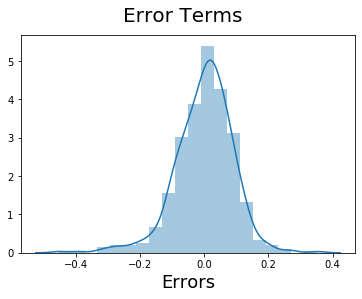

In [1395]:
# Plot the histogram of the error term 
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins= 20)
fig.suptitle('Error Terms', fontsize = 20 )
plt.xlabel('Errors', fontsize = 18)

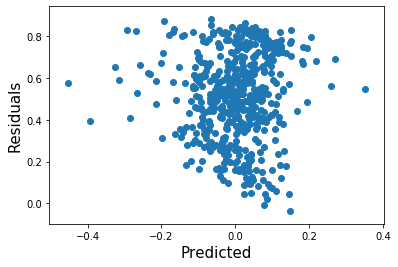

In [1411]:
plt.scatter((y_train-y_train_pred),y_train_pred)
plt.xlabel('Predicted', fontsize= 15)
plt.ylabel('Residuals', fontsize=15)
plt.show()

In [1412]:
# We can see that the residuals does not form any pattern hence they are independent of each other 

### Making Prediction

In [1396]:
# Since we had scaled training numerical variables hence we also need to scale test variables 
num_var = ['atemp','hum', 'windspeed','cnt']
df_test[num_var] = scaler.transform(df_test[num_var])


In [1397]:
# We seperated our target variable from the test set
y_test = df_test.pop('cnt')
X_test= df_test

In [1398]:
X_test

,yr,holiday,workingday,atemp,hum,windspeed,spring,summer,winter,light_rain,misty_cloudy,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Aug,Dec,Feb,Jan,July,June,Mar,May,Nov,Oct,Sept
184,0,1,0,0.769660,0.657364,0.084219,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
535,1,0,1,0.842587,0.610133,0.153728,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.496145,0.837699,0.334206,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
221,0,0,1,0.795343,0.437098,0.339570,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0
152,0,0,1,0.741471,0.314298,0.537414,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,1,0,0,0.243430,0.708888,0.287411,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
702,1,0,1,0.511907,0.756118,0.283397,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0
127,0,0,0,0.577380,0.650923,0.069510,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0
640,1,0,1,0.682653,0.817947,0.052115,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [1399]:
# We can use our model to make prediction 
# creating X_test_new dataframe with same columns as in our last training set
X_test_new = X_test[X_train_lm1.columns]

In [1400]:
X_test_new = sm.add_constant(X_test_new)

In [1401]:
y_test_pred = lm3.predict(X_test_new)

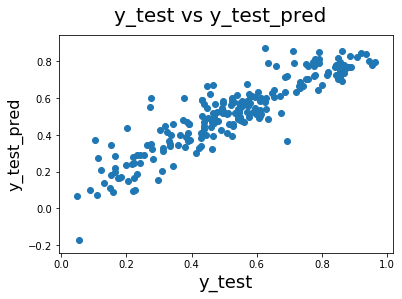

In [1413]:
# Plotting y_test and y_pred to understand the spread
fig= plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize= 20)   # plot heading
plt.xlabel('y_test', fontsize=18)                # x-label
plt.ylabel('y_test_pred', fontsize=16)                # y-label
plt.show()
# We can observe that the predicted value and actual value has strong correlation

In [1403]:
# evaluate the model, r-squared, on the test
r2= r2_score(y_true= y_test, y_pred= y_test_pred)
r2

0.8179669424739718

#### cnt = 0.29 + 0.24 * yr - 0.09 * holiday + 0.41 * atemp - 0.14 * windspeed - 0.11 * spring + 0.6 * winter - 0.29 * light_rain -0.08 * misty_cloudy - 0.05 * Dec - 0.06 * Jan - 0.06 * July - 0.05 * Nov + 0.06 * Sept

### This is our linear equation

In [1419]:
# We can see that yr(year), atemp(temperature), winter has a positive correlation with demand of shared bike while
# holiday, windspeed, spring, light_rain, misty_cloudy, Dec, Jan, July and Nov negative correlation with the demand
# of shared bikes